<a href="https://colab.research.google.com/github/molabokchi/bokchi_open_lab/blob/main/demo_hpo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 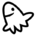 deepdriver quickstart!

welecome to deepdriver! 😀

You can refer to the guide document.
https://bokchi.gitbook.io/deepdriver-ce/

# 0. 💻 install deepdriver & requirement package for train

In [1]:
pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
pip install deepdriver==0.4.8

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 82.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 348.5/348.5 KB 39.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 KB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.8/409.8 KB 24.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.0/81.0 KB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.4/210.4 KB 19.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 KB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.0/50.0 KB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.1/147.1 KB 15.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.7/112.7 KB 15.3 MB/s eta 0:00:00
  Created wheel

In [3]:
pip install protobuf==3.20.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 41.0 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.21.12
    Uninstalling protobuf-4.21.12:
      Successfully uninstalled protobuf-4.21.12
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.9.2 requires protobuf<3.20,>=3.9.2, but you have protobuf 3.20.0 which is incompatible.
tensorboard 2.9.1 requires protobuf<3.20,>=3.9.2, but you have protobuf 3.20.0 which is incompatible.
grpcio-tools 1.51.1 requires protobuf<5.0dev,>=4.21.6, but you have protobuf 3.20.0 which is incompatible.
googleapis-common-protos 1.57.1 requires protobuf!=3.20.0,!=3.20.1,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.19.5, but you have protobuf 3.20.0 which is i

#1. ➕ import deepdriver & deeplearnig framework



In [4]:
import tensorflow as tf

In [5]:
import deepdriver

#2. prepare dataset

In [6]:
!wget --no-check-certificate \
https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
-O /tmp/cats_and_dogs_filtered.zip

--2023-01-12 01:40:15--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.12.128, 172.217.194.128, 172.253.118.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.12.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M  21.3MB/s    in 3.9s    

2023-01-12 01:40:19 (16.9 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [7]:
import os
import zipfile
import shutil

train_dir = '/content/cat_dog/'
if os.path.isdir(train_dir):
  shutil.rmtree(train_dir)
  os.mkdir(train_dir)
else:
  os.mkdir(train_dir)

model_dir = '/content/model'

if os.path.isdir(model_dir):
  shutil.rmtree(model_dir)
  os.mkdir(model_dir)
else:
  os.mkdir(model_dir)
local_zip = '/tmp/cats_and_dogs_filtered.zip'
data_dir ='/tmp/cats_and_dogs_filtered/train'
data_doc_dir='/tmp/cats_and_dogs_filtered/train/dogs'
data_cat_dir='/tmp/cats_and_dogs_filtered/train/cats'
valid_dir ='/tmp/cats_and_dogs_filtered/validation'
data_dog_valid_dir='/tmp/cats_and_dogs_filtered/validation/dogs'
data_cat_valid_dir='/tmp/cats_and_dogs_filtered/validation/cats'
zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('/tmp')
zip_ref.close()

In [8]:
# train용 폴더 생성
train_set_dir = os.path.join(train_dir, 'train_set')
os.mkdir(train_set_dir)
train_dog_dir = os.path.join(train_set_dir, 'dog')
os.mkdir(train_dog_dir)
train_cat_dir = os.path.join(train_set_dir, 'cat')
os.mkdir(train_cat_dir)
# valid용 폴더 생성
valid_set_dir = os.path.join(train_dir, 'valid_set')
os.mkdir(valid_set_dir)
valid_dog_dir = os.path.join(valid_set_dir, 'dog')
os.mkdir(valid_dog_dir)
valid_cat_dir = os.path.join(valid_set_dir, 'cat')
os.mkdir(valid_cat_dir)
# test용 폴더 생성
test_set_dir = os.path.join(train_dir, 'test_set')
os.mkdir(test_set_dir)
test_dog_dir = os.path.join(test_set_dir, 'dog')
os.mkdir(test_dog_dir)
test_cat_dir = os.path.join(test_set_dir, 'cat')
os.mkdir(test_cat_dir)

In [9]:
# image file name list 생성
import shutil
total_data_count =1000
train_data_count =int(total_data_count*0.8)
test_data_count = int(total_data_count*0.1)
valid_data_count =total_data_count - train_data_count -test_data_count
dog_files = [f'dog.{i}.jpg' for i in range(total_data_count)]
cat_files = [f'cat.{i}.jpg' for i in range(total_data_count)]

 
# 각 폴더로 image 이동
for file in dog_files[:train_data_count]:
    src = os.path.join(data_doc_dir, file)
    dst = os.path.join(train_dog_dir, file)
    shutil.move(src, dst)
    
for file in dog_files[train_data_count:train_data_count+test_data_count]:
    src = os.path.join(data_doc_dir, file)
    dst = os.path.join(valid_dog_dir, file)
    shutil.move(src, dst)
 
for file in dog_files[train_data_count+test_data_count:total_data_count]:
    src = os.path.join(data_doc_dir, file)
    dst = os.path.join(test_dog_dir, file)
    shutil.move(src, dst)
 
for file in cat_files[:train_data_count]:
    src = os.path.join(data_cat_dir, file)
    dst = os.path.join(train_cat_dir, file)
    shutil.move(src, dst)
    
for file in cat_files[train_data_count:train_data_count+test_data_count]:
    src = os.path.join(data_cat_dir, file)
    dst = os.path.join(valid_cat_dir, file)
    shutil.move(src, dst)
 
for file in cat_files[train_data_count+test_data_count:total_data_count]:
    src = os.path.join(data_cat_dir, file)
    dst = os.path.join(test_cat_dir, file)
    shutil.move(src, dst)

In [10]:
train_cat_fnames = os.listdir( train_cat_dir )
train_dog_fnames = os.listdir( train_dog_dir )

In [11]:
print('Total training cat images :', len(os.listdir(train_cat_dir)))
print('Total training dog images :', len(os.listdir(train_dog_dir)))

print('Total validation cat images :', len(os.listdir(valid_cat_dir)))
print('Total validation dog images :', len(os.listdir(valid_dog_dir)))


print('Total test cat images :', len(os.listdir(test_cat_dir)))
print('Total test dog images :', len(os.listdir(test_dog_dir)))

Total training cat images : 800
Total training dog images : 800
Total validation cat images : 100
Total validation dog images : 100
Total test cat images : 100
Total test dog images : 100


#2. ⚙ deepdriver server setting

In [12]:
deepdriver.setting(http_host="54.180.86.146:9011" ,grpc_host="54.180.86.146:19051")

#3. 🔌 log in to deepdriver

In [13]:
deepdriver.login(key="ZmIyNWQxNGJkMzUxYTVjODQ2NjM5NTgzOTM0YTM2OGE2ZmJiY2M2MWMwOWQ0OWFkNjU2YzNkM2UxMjA0YTVkZg==")

True

#4. 🥼 create hpo

In [14]:
experiment_name="cat_dog_cnn_hpo4"

In [15]:
hpo_configuration = {
    "metric": {"name": "accuracy", "goal": "maximize"},
    "method": "grid",
    "parameters": {
        "batch_size": {
            "values": [16,32,64,128]
        },
        "learning_rate": {
            "range": [0.01, 0.001]
        },
        "hidden_layer":{
            "values": [32,64,128]
        },
        "epoch" :{
            "values": [5,10]
        }

    }
}

In [16]:
# experiment init & config hyperparam
deepdriver.create_hpo(exp_name= experiment_name,hpo_config= hpo_configuration)

HPO initialized
Team Name=molamola.python
Exp Name=cat_dog_cnn_hpo4
Exp Url=/experi/molamola.python/cat_dog_cnn_hpo4/exp/chart
optuna study aleady exist !


('success', 512)

#5. 📚 train your code and send log

make model

In [17]:
def define_model(hidden_layer, learning_rate):

  model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(hidden_layer, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
  ])
  from tensorflow.keras.optimizers import RMSprop

  model.compile(optimizer=RMSprop(lr=learning_rate),
            loss='binary_crossentropy',
            metrics = ['accuracy'])
  return model

In [18]:
def prepare_data(batch_size):
  from tensorflow.keras.preprocessing.image import ImageDataGenerator

  train_datagen = ImageDataGenerator( rescale = 1.0/255. )
  test_datagen  = ImageDataGenerator( rescale = 1.0/255. )
  valid_datagen  = ImageDataGenerator( rescale = 1.0/255. )

  train_generator = train_datagen.flow_from_directory(train_set_dir,
                                                    batch_size=batch_size,
                                                    class_mode='binary',
                                                    target_size=(150, 150))
  validation_generator =  valid_datagen.flow_from_directory(valid_set_dir,
                                                        batch_size=batch_size,
                                                        class_mode  = 'binary',
                                                        target_size = (150, 150))

  test_generator =  test_datagen.flow_from_directory(test_set_dir,
                                                        batch_size=batch_size,
                                                        class_mode  = 'binary',
                                                        target_size = (150, 150))
  return train_generator, validation_generator, test_generator

In [24]:
def train():
  import tensorflow as tf 
  print(deepdriver.config.Items())
  model = define_model(deepdriver.config.hidden_layer, deepdriver.config.learning_rate)
  
  train_generator, validation_generator, test_generator = prepare_data(deepdriver.config.batch_size)

  class CustomCallback(tf.keras.callbacks.Callback):

    # def on_train_end(self, logs=None):
    #     keys = list(logs.keys())
    #     deepdriver.finish()

    def on_epoch_end(self, epoch, logs=None):
        keys = list(logs.keys())
        deepdriver.log({"acc": logs["accuracy"], "loss": logs["loss"], "val_acc": logs["val_accuracy"], "val_loss": logs["val_loss"]})
        #deepdriver.log(logs)

  steps_per_epoch = train_generator.n//deepdriver.config.batch_size
  validation_steps = validation_generator.n//deepdriver.config.batch_size

  history = model.fit(train_generator,
                    validation_data=validation_generator,
                    steps_per_epoch=steps_per_epoch,
                    epochs=deepdriver.config.epoch,
                    validation_steps=validation_steps ,
                    callbacks=[CustomCallback()],
                    verbose=2)
  result = model.evaluate(test_generator)
  result_dict =dict(zip(model.metrics_names, result))
  return result_dict["accuracy"]


In [25]:
 deepdriver.run_hpo(exp_name=experiment_name, func=train, count=10)

DeepDriver initialized
Team Name=molamola.python
Exp Name=cat_dog_cnn_hpo4
Run Name=run-9
Run URL=http://54.180.86.146:9111/experi/molamola.python/cat_dog_cnn_hpo4/run-9/run/chart
[('batch_size', 32), ('learning_rate', 0.0028697199868256), ('hidden_layer', 64), ('epoch', 10)]
Found 1600 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Epoch 1/10
50/50 - 6s - loss: 0.9953 - accuracy: 0.5594 - val_loss: 0.6999 - val_accuracy: 0.5000 - 6s/epoch - 123ms/step
Epoch 2/10
50/50 - 6s - loss: 0.6997 - accuracy: 0.5562 - val_loss: 0.6828 - val_accuracy: 0.5469 - 6s/epoch - 123ms/step
Epoch 3/10
50/50 - 5s - loss: 0.6421 - accuracy: 0.6419 - val_loss: 0.7176 - val_accuracy: 0.5729 - 5s/epoch - 104ms/step
Epoch 4/10
50/50 - 5s - loss: 0.6213 - accuracy: 0.6656 - val_loss: 0.6459 - val_accuracy: 0.5938 - 5s/epoch - 104ms/step
Epoch 5/10
50/50 - 5s - loss: 0.5884 - accuracy: 0.7237 - val_loss: 0.6080 - val_accuracy: 0.6615 - 5s/epoch - 

[I 2023-01-12 02:17:47,368] Trial 8 finished with value: 0.6600000262260437 and parameters: {'batch_size': 32, 'learning_rate': 0.0028697199868256, 'hidden_layer': 64, 'epoch': 10}. Best is trial 8 with value: 0.6600000262260437.


DeepDriver initialized
Team Name=molamola.python
Exp Name=cat_dog_cnn_hpo4
Run Name=run-10
Run URL=http://54.180.86.146:9111/experi/molamola.python/cat_dog_cnn_hpo4/run-10/run/chart
[('batch_size', 64), ('learning_rate', 0.005542096106226242), ('hidden_layer', 128), ('epoch', 10)]
Found 1600 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Epoch 1/10
25/25 - 6s - loss: 3.7688 - accuracy: 0.5188 - val_loss: 0.6932 - val_accuracy: 0.5052 - 6s/epoch - 245ms/step
Epoch 2/10
25/25 - 5s - loss: 0.7221 - accuracy: 0.4850 - val_loss: 0.6932 - val_accuracy: 0.5156 - 5s/epoch - 205ms/step
Epoch 3/10
25/25 - 5s - loss: 0.6947 - accuracy: 0.5069 - val_loss: 0.6924 - val_accuracy: 0.5104 - 5s/epoch - 203ms/step
Epoch 4/10
25/25 - 5s - loss: 0.7025 - accuracy: 0.4994 - val_loss: 0.6904 - val_accuracy: 0.5156 - 5s/epoch - 208ms/step
Epoch 5/10
25/25 - 5s - loss: 0.6935 - accuracy: 0.4850 - val_loss: 0.6931 - val_accuracy: 0.5104 - 5s/epo

[I 2023-01-12 02:18:48,627] Trial 9 finished with value: 0.5 and parameters: {'batch_size': 64, 'learning_rate': 0.005542096106226242, 'hidden_layer': 128, 'epoch': 10}. Best is trial 8 with value: 0.6600000262260437.


DeepDriver initialized
Team Name=molamola.python
Exp Name=cat_dog_cnn_hpo4
Run Name=run-11
Run URL=http://54.180.86.146:9111/experi/molamola.python/cat_dog_cnn_hpo4/run-11/run/chart
[('batch_size', 64), ('learning_rate', 0.001213638206118904), ('hidden_layer', 32), ('epoch', 10)]
Found 1600 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Epoch 1/10
25/25 - 6s - loss: 0.9579 - accuracy: 0.5031 - val_loss: 0.6922 - val_accuracy: 0.5000 - 6s/epoch - 242ms/step
Epoch 2/10
25/25 - 5s - loss: 0.6925 - accuracy: 0.5050 - val_loss: 0.7089 - val_accuracy: 0.5000 - 5s/epoch - 204ms/step
Epoch 3/10
25/25 - 5s - loss: 0.6938 - accuracy: 0.5138 - val_loss: 0.6832 - val_accuracy: 0.5625 - 5s/epoch - 203ms/step
Epoch 4/10
25/25 - 5s - loss: 0.6930 - accuracy: 0.5600 - val_loss: 0.6691 - val_accuracy: 0.5885 - 5s/epoch - 202ms/step
Epoch 5/10
25/25 - 5s - loss: 0.6631 - accuracy: 0.6169 - val_loss: 0.6459 - val_accuracy: 0.6146 - 5s/epoc

[I 2023-01-12 02:19:50,812] Trial 10 finished with value: 0.6949999928474426 and parameters: {'batch_size': 64, 'learning_rate': 0.001213638206118904, 'hidden_layer': 32, 'epoch': 10}. Best is trial 10 with value: 0.6949999928474426.


DeepDriver initialized
Team Name=molamola.python
Exp Name=cat_dog_cnn_hpo4
Run Name=run-12
Run URL=http://54.180.86.146:9111/experi/molamola.python/cat_dog_cnn_hpo4/run-12/run/chart
[('batch_size', 16), ('learning_rate', 0.007644945815010751), ('hidden_layer', 32), ('epoch', 5)]
Found 1600 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Epoch 1/5
100/100 - 6s - loss: 2.5856 - accuracy: 0.4881 - val_loss: 1.5971 - val_accuracy: 0.5052 - 6s/epoch - 60ms/step
Epoch 2/5
100/100 - 5s - loss: 0.7109 - accuracy: 0.4975 - val_loss: 0.6936 - val_accuracy: 0.4948 - 5s/epoch - 51ms/step
Epoch 3/5
100/100 - 5s - loss: 0.6936 - accuracy: 0.4913 - val_loss: 0.6934 - val_accuracy: 0.4948 - 5s/epoch - 51ms/step
Epoch 4/5
100/100 - 5s - loss: 0.6935 - accuracy: 0.4963 - val_loss: 0.6931 - val_accuracy: 0.5104 - 5s/epoch - 52ms/step
Epoch 5/5
100/100 - 5s - loss: 0.6937 - accuracy: 0.4850 - val_loss: 0.6931 - val_accuracy: 0.5000 - 5s/epoc

[I 2023-01-12 02:20:31,404] Trial 11 finished with value: 0.5 and parameters: {'batch_size': 16, 'learning_rate': 0.007644945815010751, 'hidden_layer': 32, 'epoch': 5}. Best is trial 10 with value: 0.6949999928474426.


DeepDriver initialized
Team Name=molamola.python
Exp Name=cat_dog_cnn_hpo4
Run Name=run-13
Run URL=http://54.180.86.146:9111/experi/molamola.python/cat_dog_cnn_hpo4/run-13/run/chart
[('batch_size', 64), ('learning_rate', 0.007140892781506512), ('hidden_layer', 64), ('epoch', 5)]
Found 1600 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Epoch 1/5
25/25 - 6s - loss: 14.3701 - accuracy: 0.5025 - val_loss: 0.6929 - val_accuracy: 0.4896 - 6s/epoch - 255ms/step
Epoch 2/5
25/25 - 5s - loss: 0.6928 - accuracy: 0.5200 - val_loss: 0.6933 - val_accuracy: 0.5000 - 5s/epoch - 210ms/step
Epoch 3/5
25/25 - 5s - loss: 0.6957 - accuracy: 0.5100 - val_loss: 0.6901 - val_accuracy: 0.5677 - 5s/epoch - 206ms/step
Epoch 4/5
25/25 - 5s - loss: 0.6928 - accuracy: 0.5381 - val_loss: 0.6936 - val_accuracy: 0.4948 - 5s/epoch - 207ms/step
Epoch 5/5
25/25 - 5s - loss: 0.7177 - accuracy: 0.4981 - val_loss: 0.6932 - val_accuracy: 0.5052 - 5s/epoch - 2

[I 2023-01-12 02:21:07,509] Trial 12 finished with value: 0.5 and parameters: {'batch_size': 64, 'learning_rate': 0.007140892781506512, 'hidden_layer': 64, 'epoch': 5}. Best is trial 10 with value: 0.6949999928474426.


DeepDriver initialized
Team Name=molamola.python
Exp Name=cat_dog_cnn_hpo4
Run Name=run-14
Run URL=http://54.180.86.146:9111/experi/molamola.python/cat_dog_cnn_hpo4/run-14/run/chart
[('batch_size', 64), ('learning_rate', 0.006657005721327624), ('hidden_layer', 128), ('epoch', 10)]
Found 1600 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Epoch 1/10
25/25 - 6s - loss: 10.8457 - accuracy: 0.5125 - val_loss: 0.6930 - val_accuracy: 0.4948 - 6s/epoch - 243ms/step
Epoch 2/10
25/25 - 5s - loss: 0.6930 - accuracy: 0.5138 - val_loss: 0.6910 - val_accuracy: 0.5417 - 5s/epoch - 204ms/step
Epoch 3/10
25/25 - 5s - loss: 0.7653 - accuracy: 0.5056 - val_loss: 0.7095 - val_accuracy: 0.5052 - 5s/epoch - 206ms/step
Epoch 4/10
25/25 - 5s - loss: 0.7110 - accuracy: 0.5456 - val_loss: 0.6947 - val_accuracy: 0.5000 - 5s/epoch - 204ms/step
Epoch 5/10
25/25 - 5s - loss: 0.7147 - accuracy: 0.5100 - val_loss: 0.6943 - val_accuracy: 0.5000 - 5s/ep

[I 2023-01-12 02:22:09,802] Trial 13 finished with value: 0.4950000047683716 and parameters: {'batch_size': 64, 'learning_rate': 0.006657005721327624, 'hidden_layer': 128, 'epoch': 10}. Best is trial 10 with value: 0.6949999928474426.


DeepDriver initialized
Team Name=molamola.python
Exp Name=cat_dog_cnn_hpo4
Run Name=run-15
Run URL=http://54.180.86.146:9111/experi/molamola.python/cat_dog_cnn_hpo4/run-15/run/chart
[('batch_size', 64), ('learning_rate', 0.00695952072108796), ('hidden_layer', 32), ('epoch', 5)]
Found 1600 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Epoch 1/5
25/25 - 6s - loss: 5.9167 - accuracy: 0.5256 - val_loss: 0.7281 - val_accuracy: 0.4948 - 6s/epoch - 245ms/step
Epoch 2/5
25/25 - 5s - loss: 0.7010 - accuracy: 0.5013 - val_loss: 0.6931 - val_accuracy: 0.5052 - 5s/epoch - 207ms/step
Epoch 3/5
25/25 - 6s - loss: 0.6935 - accuracy: 0.4856 - val_loss: 0.6933 - val_accuracy: 0.4948 - 6s/epoch - 246ms/step
Epoch 4/5
25/25 - 5s - loss: 0.6933 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.4948 - 5s/epoch - 205ms/step
Epoch 5/5
25/25 - 5s - loss: 0.6992 - accuracy: 0.4925 - val_loss: 0.6932 - val_accuracy: 0.4896 - 5s/epoch - 207

[I 2023-01-12 02:22:46,632] Trial 14 finished with value: 0.5 and parameters: {'batch_size': 64, 'learning_rate': 0.00695952072108796, 'hidden_layer': 32, 'epoch': 5}. Best is trial 10 with value: 0.6949999928474426.


DeepDriver initialized
Team Name=molamola.python
Exp Name=cat_dog_cnn_hpo4
Run Name=run-16
Run URL=http://54.180.86.146:9111/experi/molamola.python/cat_dog_cnn_hpo4/run-16/run/chart
[('batch_size', 128), ('learning_rate', 0.006795825767581456), ('hidden_layer', 64), ('epoch', 5)]
Found 1600 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Epoch 1/5
12/12 - 6s - loss: 11.3061 - accuracy: 0.5177 - val_loss: 0.6931 - val_accuracy: 0.5078 - 6s/epoch - 510ms/step
Epoch 2/5
12/12 - 5s - loss: 0.6931 - accuracy: 0.5061 - val_loss: 0.6922 - val_accuracy: 0.5547 - 5s/epoch - 410ms/step
Epoch 3/5
12/12 - 5s - loss: 0.6932 - accuracy: 0.5020 - val_loss: 0.6930 - val_accuracy: 0.5078 - 5s/epoch - 410ms/step
Epoch 4/5
12/12 - 5s - loss: 0.6933 - accuracy: 0.4959 - val_loss: 0.6929 - val_accuracy: 0.5312 - 5s/epoch - 410ms/step
Epoch 5/5
12/12 - 5s - loss: 0.6932 - accuracy: 0.5041 - val_loss: 0.6937 - val_accuracy: 0.4688 - 5s/epoch - 

[I 2023-01-12 02:23:26,656] Trial 15 finished with value: 0.5 and parameters: {'batch_size': 128, 'learning_rate': 0.006795825767581456, 'hidden_layer': 64, 'epoch': 5}. Best is trial 10 with value: 0.6949999928474426.


DeepDriver initialized
Team Name=molamola.python
Exp Name=cat_dog_cnn_hpo4
Run Name=run-17
Run URL=http://54.180.86.146:9111/experi/molamola.python/cat_dog_cnn_hpo4/run-17/run/chart
[('batch_size', 32), ('learning_rate', 0.004377383490194764), ('hidden_layer', 64), ('epoch', 5)]
Found 1600 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Epoch 1/5
50/50 - 6s - loss: 3.3248 - accuracy: 0.5019 - val_loss: 0.6931 - val_accuracy: 0.5052 - 6s/epoch - 121ms/step
Epoch 2/5
50/50 - 5s - loss: 0.6934 - accuracy: 0.4881 - val_loss: 0.6932 - val_accuracy: 0.5000 - 5s/epoch - 102ms/step
Epoch 3/5
50/50 - 5s - loss: 0.6936 - accuracy: 0.4944 - val_loss: 2.0313 - val_accuracy: 0.4896 - 5s/epoch - 103ms/step
Epoch 4/5
50/50 - 5s - loss: 0.7668 - accuracy: 0.4881 - val_loss: 0.6933 - val_accuracy: 0.4948 - 5s/epoch - 103ms/step
Epoch 5/5
50/50 - 5s - loss: 0.6934 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5052 - 5s/epoch - 10

[I 2023-01-12 02:24:02,171] Trial 16 finished with value: 0.5 and parameters: {'batch_size': 32, 'learning_rate': 0.004377383490194764, 'hidden_layer': 64, 'epoch': 5}. Best is trial 10 with value: 0.6949999928474426.


DeepDriver initialized
Team Name=molamola.python
Exp Name=cat_dog_cnn_hpo4
Run Name=run-18
Run URL=http://54.180.86.146:9111/experi/molamola.python/cat_dog_cnn_hpo4/run-18/run/chart
[('batch_size', 16), ('learning_rate', 0.005248151645497859), ('hidden_layer', 128), ('epoch', 10)]
Found 1600 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Epoch 1/10
100/100 - 6s - loss: 1.0144 - accuracy: 0.4831 - val_loss: 0.6931 - val_accuracy: 0.5000 - 6s/epoch - 59ms/step
Epoch 2/10
100/100 - 5s - loss: 0.6935 - accuracy: 0.4863 - val_loss: 0.6932 - val_accuracy: 0.4948 - 5s/epoch - 51ms/step
Epoch 3/10
100/100 - 5s - loss: 0.6934 - accuracy: 0.4950 - val_loss: 0.6931 - val_accuracy: 0.5052 - 5s/epoch - 53ms/step
Epoch 4/10
100/100 - 5s - loss: 0.6933 - accuracy: 0.5050 - val_loss: 0.6933 - val_accuracy: 0.4948 - 5s/epoch - 53ms/step
Epoch 5/10
100/100 - 5s - loss: 0.6934 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5104 - 

[I 2023-01-12 02:25:10,080] Trial 17 finished with value: 0.5 and parameters: {'batch_size': 16, 'learning_rate': 0.005248151645497859, 'hidden_layer': 128, 'epoch': 10}. Best is trial 10 with value: 0.6949999928474426.


True